In [28]:
# check installed version
import pycaret
# import pycaret clustering and init setup
from pycaret.clustering import *
import pandas as pd
import datetime
pycaret.__version__

'3.0.4'

### ingest and setup

In [29]:
m2_pipeline = pd.read_csv('pipeline1.csv')

In [54]:
#change is surge price rate of change per observation, change.1 is precursor
#sum_change is surge sum_change per surge, and surge_area is surge alone
keepable = ['precursor_buy_cap_pct_change', 
            'precursor_ask_cap_pct_change',
            'precursor_bid_vol_pct_change', 
            'precursor_ask_vol_pct_change', 'change.1',
            'change','sum_change','surge_area']
m2_pipeline = m2_pipeline[keepable]

In [32]:
m2_pipeline

,precursor_buy_cap_pct_change,precursor_ask_cap_pct_change,precursor_bid_vol_pct_change,precursor_ask_vol_pct_change,change.1,change,sum_change,surge_area
0,-0.000618,-0.000017,-0.000210,-0.002384,-0.000533,0.505364,0.505364,0.505364
1,-0.002358,-0.000002,-0.000818,-0.000333,0.000135,0.000670,0.000670,0.000670
2,0.004750,-0.000036,0.001573,-0.004835,-0.000233,0.001273,0.001808,0.003615
3,-0.000987,0.000002,-0.000398,0.000062,-0.000502,0.000873,0.002114,0.004229
4,0.001531,0.000010,0.000334,0.001094,-0.000768,0.001305,0.001305,0.001305
...,...,...,...,...,...,...,...,...
5632,-0.320042,0.404540,1.149854,0.520527,-0.283913,0.109437,0.109437,0.109437
5633,0.004809,0.000779,0.001181,0.003685,0.000399,0.000599,0.000599,0.000599
5634,-0.000989,-0.000484,-0.000248,-0.002320,0.000000,0.000898,0.000898,0.000898
5635,0.006274,-0.001249,0.001518,-0.005973,0.000000,0.000699,0.000699,0.000699


In [33]:
m2_pipeline = m2_pipeline.dropna()
print(m2_pipeline.isna().sum(axis=1).astype(bool).sum())


0


In [34]:
m2_pipeline.columns

Index(['precursor_buy_cap_pct_change', 'precursor_ask_cap_pct_change',
       'precursor_bid_vol_pct_change', 'precursor_ask_vol_pct_change',
       'change.1', 'change', 'sum_change', 'surge_area'],
      dtype='object')

In [35]:
m2_pipeline.dtypes

precursor_buy_cap_pct_change    float64
precursor_ask_cap_pct_change    float64
precursor_bid_vol_pct_change    float64
precursor_ask_vol_pct_change    float64
change.1                        float64
change                          float64
sum_change                      float64
surge_area                      float64
dtype: object

In [36]:
m2_pipeline = m2_pipeline.astype('float')

In [37]:
m2_pipeline.dtypes

precursor_buy_cap_pct_change    float64
precursor_ask_cap_pct_change    float64
precursor_bid_vol_pct_change    float64
precursor_ask_vol_pct_change    float64
change.1                        float64
change                          float64
sum_change                      float64
surge_area                      float64
dtype: object

In [38]:
#HOME
s = setup(m2_pipeline, session_id = 42)

,Description,Value
0,Session id,42
1,Original data shape,"(5635, 8)"
2,Transformed data shape,"(5635, 8)"
3,Numeric features,8
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [39]:
# import ClusteringExperiment and init the class
from pycaret.clustering import ClusteringExperiment
exp = ClusteringExperiment()

In [40]:
# check the type of exp
type(exp)


pycaret.clustering.oop.ClusteringExperiment

In [41]:
# init setup on exp
exp.setup(m2_pipeline, session_id = 42)

,Description,Value
0,Session id,42
1,Original data shape,"(5635, 8)"
2,Transformed data shape,"(5635, 8)"
3,Numeric features,8
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [42]:
# to check all the available models
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


### initiate clustering algo

In [43]:
# train kmeans model
m = create_model('meanshift')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8120,294230.5297,0.3882,0,0,0


### assign model

In [44]:
cluster = assign_model(m)
cluster

,precursor_buy_cap_pct_change,precursor_ask_cap_pct_change,precursor_bid_vol_pct_change,precursor_ask_vol_pct_change,change.1,change,sum_change,surge_area,Cluster
0,-0.000618,-0.000017,-0.000210,-0.002384,-0.000533,0.505364,0.505364,0.505364,Cluster 2
1,-0.002358,-0.000002,-0.000818,-0.000333,0.000135,0.000670,0.000670,0.000670,Cluster 0
2,0.004750,-0.000036,0.001573,-0.004835,-0.000233,0.001273,0.001808,0.003615,Cluster 0
3,-0.000987,0.000002,-0.000398,0.000062,-0.000502,0.000873,0.002114,0.004229,Cluster 0
4,0.001531,0.000010,0.000334,0.001094,-0.000768,0.001305,0.001305,0.001305,Cluster 0
...,...,...,...,...,...,...,...,...,...
5631,0.000555,0.000699,0.000168,0.003437,-0.000398,0.001297,0.001297,0.001297,Cluster 0
5632,-0.320042,0.404540,1.149854,0.520527,-0.283913,0.109437,0.109437,0.109437,Cluster 74
5633,0.004809,0.000779,0.001181,0.003685,0.000399,0.000599,0.000599,0.000599,Cluster 0
5634,-0.000989,-0.000484,-0.000248,-0.002320,0.000000,0.000898,0.000898,0.000898,Cluster 0


### push clustered df to csv (Finish pipeline step)

In [45]:
# setup storage string

# now = datetime.datetime.now()
# print("Current date and time: ")
# print(now.strftime("%Y-%m-%d %H:%M:%S"))

# model_type = 'ap'
# run_time = now.strftime("%Y-%m-%d %H:%M:%S")
# file_name = 'clustered/'+ 'clustered_'+ model_type+' _'+ run_time+ '.csv'
# print(file_name)
# cluster.to_csv(file_name)

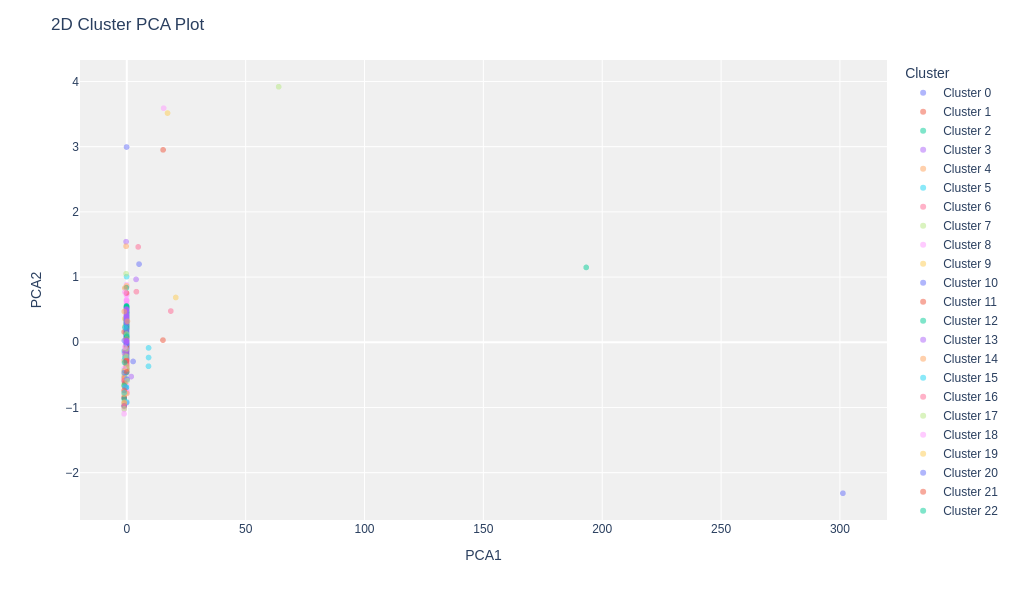

In [46]:
# plot pca cluster plot 
plot_model(m, plot = 'cluster')

In [47]:
# plot elbow, not for ap
# plot_model(m, plot = 'elbow')

In [48]:
# plot silhouette
# plot_model(m, plot = 'silhouette')

In [49]:
evaluate_model(m)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [50]:
# predict on test set
sc_pred = predict_model(m, data=m2_pipeline)
sc_pred

,precursor_buy_cap_pct_change,precursor_ask_cap_pct_change,precursor_bid_vol_pct_change,precursor_ask_vol_pct_change,change.1,change,sum_change,surge_area,Cluster
0,-0.000618,-0.000017,-0.000210,-0.002384,-0.000533,0.505364,0.505364,0.505364,Cluster 2
1,-0.002358,-0.000002,-0.000818,-0.000333,0.000135,0.000670,0.000670,0.000670,Cluster 0
2,0.004750,-0.000036,0.001573,-0.004835,-0.000233,0.001273,0.001808,0.003615,Cluster 0
3,-0.000987,0.000002,-0.000398,0.000062,-0.000502,0.000873,0.002114,0.004229,Cluster 0
4,0.001531,0.000010,0.000334,0.001094,-0.000768,0.001305,0.001305,0.001305,Cluster 0
...,...,...,...,...,...,...,...,...,...
5631,0.000555,0.000699,0.000168,0.003437,-0.000398,0.001297,0.001297,0.001297,Cluster 0
5632,-0.320042,0.404540,1.149854,0.520527,-0.283913,0.109437,0.109437,0.109437,Cluster 74
5633,0.004809,0.000779,0.001181,0.003685,0.000399,0.000599,0.000599,0.000599,Cluster 0
5634,-0.000989,-0.000484,-0.000248,-0.002320,0.000000,0.000898,0.000898,0.000898,Cluster 0


### eliminate rows with cluster membership under two, for step3 purposes

In [51]:
# Group the DataFrame by the Cluster column
grouped = sc_pred.groupby('Cluster')

# Filter out rows that belong to only one cluster
filtered = grouped.filter(lambda x: len(x) > 1)

In [52]:
filtered.columns

Index(['precursor_buy_cap_pct_change', 'precursor_ask_cap_pct_change',
       'precursor_bid_vol_pct_change', 'precursor_ask_vol_pct_change',
       'change.1', 'change', 'sum_change', 'surge_area', 'Cluster'],
      dtype='object')

In [53]:
now = datetime.datetime.now()
print("Current date and time: ")
print(now.strftime("%Y-%m-%d %H:%M:%S"))

model_type = 'meanshift'
run_time = now.strftime("%Y-%m-%d %H:%M:%S")
file_name = 'clustered/'+ 'clustered_'+ model_type+' _'+ run_time+ '.csv'
print(file_name)
filtered.to_csv(file_name)

Current date and time: 
2023-09-04 14:59:41
clustered/clustered_meanshift _2023-09-04 14:59:41.csv
